In [8]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import joblib

In [9]:
# Load your dataset
data = pd.read_csv('patient_readmission_dataset.csv')

In [10]:
# Data Exploration
print(data.head())  # Display the first few rows of the dataset
print(data.info())  # Check for data types and missing values
print(data.describe())  # Summary statistics for numerical columns

   PatientID  Age  Gender MaritalStatus  MedicalHistory TreatmentType  \
0          1   69  Female        Single               0    Medication   
1          2   55  Female      Divorced               0       Surgery   
2          3   21  Female        Single               0    Medication   
3          4   87    Male      Divorced               3       Surgery   
4          5   65  Female        Single               9       Therapy   

   LengthOfStay  NumberOfVisits            Diagnosis DischargeCondition  \
0            13               1         Hypertension             Stable   
1             2              10         Hypertension           Critical   
2            17               1         Hypertension             Stable   
3             6              10             Diabetes           Critical   
4            26              11  Respiratory Disease           Critical   

  FollowUpAppointment InsuranceType  DistanceFromFacility Readmitted  
0                 Yes      Medicare    

In [11]:
#Check for Missing Values
missing_values = data.isnull().sum()

In [12]:
# Check if there are any missing values to plot
if missing_values[missing_values > 0].any():
    missing_values = missing_values[missing_values > 0]  
    missing_values.plot(kind='bar', title='Missing Values')
    plt.xlabel('Features')
    plt.ylabel('Number of Missing Values')
    plt.xticks(rotation=45)
    plt.tight_layout()  
    plt.show()
else:
    print("No missing values found in the dataset.")

No missing values found in the dataset.


In [13]:
#Outlier detection and removal
z_scores = stats.zscore(data[['MedicalHistory', 'LengthOfStay', 'NumberOfVisits', 'DistanceFromFacility']])
outliers = (z_scores > 3).sum(axis=1) 
data_clean = data[outliers < 1]  


In [14]:
#Categorical value encoding
data = pd.get_dummies(data, columns=['Gender', 'MaritalStatus', 'TreatmentType', 'Diagnosis', 'DischargeCondition', 'FollowUpAppointment', 'InsuranceType'], drop_first=True)

In [15]:
#Target value encoding
data['Readmitted'] = data['Readmitted'].map({'Yes': 1, 'No': 0})

In [16]:
#Feature scaling
scaler = StandardScaler()
data[['Age', 'MedicalHistory', 'LengthOfStay', 'NumberOfVisits', 'DistanceFromFacility']] = scaler.fit_transform(data[['Age', 'MedicalHistory', 'LengthOfStay', 'NumberOfVisits', 'DistanceFromFacility']])

In [17]:
#Feature creation
data['VisitsPerYear'] = data['NumberOfVisits'] / data['Age']

In [18]:
#Dimensionality reduction
pca = PCA(n_components=10)  # You can adjust components
data_pca = pca.fit_transform(data.drop('Readmitted', axis=1))

In [19]:
#Splitting dataset into train - test set
X = data.drop('Readmitted', axis=1)
y = data['Readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
#Model train
lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [21]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [23]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [24]:
param_grid = {'n_estimators': [50, 100], 'max_depth': [5, 10]}
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10], 'n_estimators': [50, 100]})

In [25]:
#Model evaluation
y_pred = lr.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-Score:', f1_score(y_test, y_pred))
print('AUC-ROC:', roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1]))

Accuracy: 0.493
Precision: 0.5042918454935622
Recall: 0.4598825831702544
F1-Score: 0.481064483111566
AUC-ROC: 0.4778792935780918


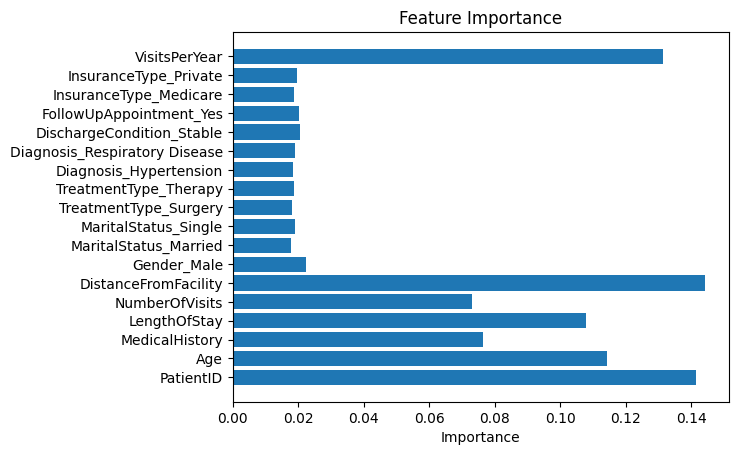

In [26]:
importances = rf.feature_importances_
plt.barh(X.columns, importances)
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

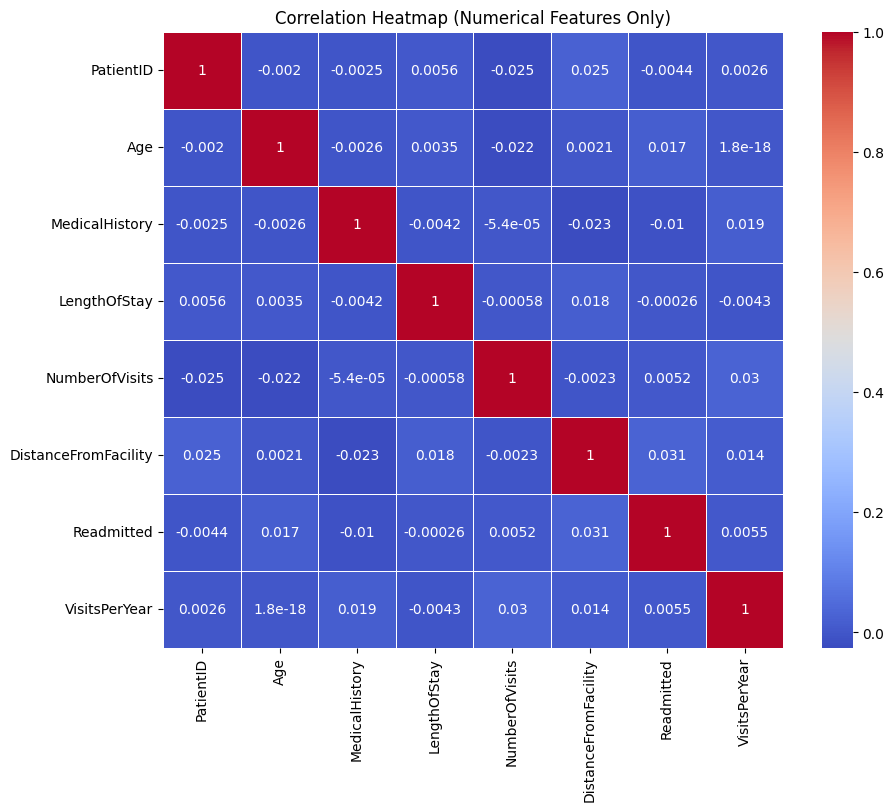

In [27]:
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Plot the heatmap of the correlation matrix for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (Numerical Features Only)')
plt.show()